In [ ]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
bitcoin_df = pd.read_excel("/content/BTC.xlsx")
dolar_df = pd.read_excel("/content/DXY.xlsx")
oro_df = pd.read_excel("/content/XAUUSD.xlsx")

In [ ]:
oro_df.head()

,Exchange Date,Mid Price
0,2024-12-31,2606.795
1,2024-12-30,2621.860
2,2024-12-27,2634.070
3,2024-12-24,2619.380
4,2024-12-23,2627.945


In [ ]:
bitcoin_df.head()

,Exchange Date,Bid,Ask,High,Low,Open,Refresh Rate,BidNet
0,2024-12-31,93686.62,93735.73,96196.45,91794.00,91923.0,346837.0,1763.62
1,2024-12-30,91923.00,91924.00,95007.72,91262.02,93792.0,337885.0,-1263.00
2,2024-12-29,93186.00,93187.00,95582.49,93007.99,94997.0,321940.0,-1811.00
3,2024-12-28,94997.00,94998.00,95190.14,93404.51,94401.0,321940.0,612.55
4,2024-12-27,94384.45,94400.61,97336.00,93136.41,95692.0,321940.0,-1308.55


In [ ]:
dolar_df.head()

,Exchange Date,Trade Price
0,2024-12-31,108.487
1,2024-12-30,108.130
2,2024-12-27,107.998
3,2024-12-26,108.129
4,2024-12-24,108.200


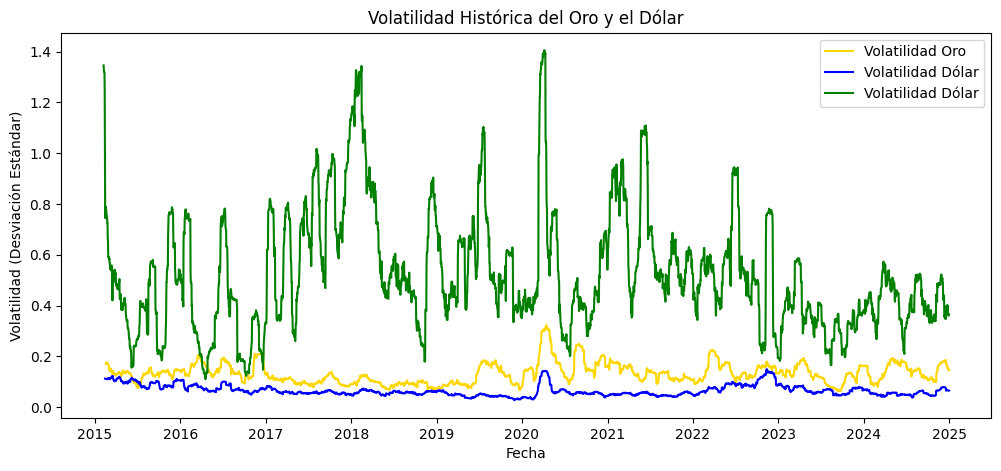

In [ ]:
# Convertir la fecha y ordenar
oro_df["Exchange Date"] = pd.to_datetime(oro_df["Exchange Date"])
dolar_df["Exchange Date"] = pd.to_datetime(dolar_df["Exchange Date"])
bitcoin_df["Exchange Date"] = pd.to_datetime(bitcoin_df["Exchange Date"])

oro_df.sort_values("Exchange Date", inplace=True)
dolar_df.sort_values("Exchange Date", inplace=True)
bitcoin_df.sort_values("Exchange Date", inplace=True)

# Calcular los rendimientos logarítmicos diarios
oro_df["Rendimiento"] = np.log(oro_df["Mid Price"] / oro_df["Mid Price"].shift(1))
dolar_df["Rendimiento"] = np.log(dolar_df["Trade Price"] / dolar_df["Trade Price"].shift(1))
bitcoin_df["Rendimiento"] = np.log(bitcoin_df["Bid"] / bitcoin_df["Bid"].shift(1))

# Calcular la volatilidad con una ventana de 30 días
oro_df["Volatilidad"] = oro_df["Rendimiento"].rolling(window=30).std() * np.sqrt(252)
dolar_df["Volatilidad"] = dolar_df["Rendimiento"].rolling(window=30).std() * np.sqrt(252)
bitcoin_df["Volatilidad"] = bitcoin_df["Rendimiento"].rolling(window=30).std() * np.sqrt(252)

# Graficar la volatilidad del Oro y el Dólar
plt.figure(figsize=(12, 5))
plt.plot(oro_df["Exchange Date"], oro_df["Volatilidad"], label="Volatilidad Oro", color="gold")
plt.plot(dolar_df["Exchange Date"], dolar_df["Volatilidad"], label="Volatilidad Dólar", color="blue")
plt.plot(bitcoin_df["Exchange Date"], bitcoin_df["Volatilidad"], label="Volatilidad Dólar", color="green")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad (Desviación Estándar)")
plt.title("Volatilidad Histórica del Oro y el Dólar")
plt.legend()
plt.show()


In [ ]:
oro_df.head()

,Exchange Date,Mid Price,Rendimiento,Volatilidad
2530,2015-01-02,1185.65,NaN,NaN
2529,2015-01-05,1193.48,0.006582,NaN
2528,2015-01-06,1206.40,0.010767,NaN
2527,2015-01-07,1214.05,0.006321,NaN
2526,2015-01-08,1208.85,-0.004292,NaN


In [ ]:
# Sustitución de valores nulos - Bitcoin
# Reemplazar valores nulos solo con la media para columnas numéricas
for col in bitcoin_df.columns:
  if bitcoin_df[col].isnull().sum() > 0:
        if bitcoin_df[col].dtype in ['int64', 'float64']:

            bitcoin_df[col].fillna(bitcoin_df[col].mean(), inplace=True)

# Verificar los resultados después de la sustitución
print("Datos después de reemplazar nulos por la media:")
print(bitcoin_df.isnull().sum())
print(bitcoin_df.head())

Datos después de reemplazar nulos por la media:
Exchange Date    0
Bid              0
Ask              0
High             0
Low              0
Open             0
Refresh Rate     0
BidNet           0
Rendimiento      0
Volatilidad      0
dtype: int64
     Exchange Date     Bid     Ask    High     Low    Open  Refresh Rate  \
3620    2015-01-01  313.81  314.78  320.97  312.60  320.97        7430.0   
3619    2015-01-02  315.41  315.42  316.82  311.93  313.84        8666.0   
3618    2015-01-03  280.00  281.11  316.49  280.00  315.41       10459.0   
3617    2015-01-04  264.03  264.73  289.37  255.00  279.99        9787.0   
3616    2015-01-05  276.80  277.92  279.99  264.05  264.05        8251.0   

         BidNet  Rendimiento  Volatilidad  
3620  25.800721     0.001575     0.521856  
3619   1.600000     0.005086     0.521856  
3618 -35.410000    -0.119084     0.521856  
3617 -15.970000    -0.058727     0.521856  
3616  12.770000     0.047232     0.521856  


<ipython-input-228-215f3cfe35be>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bitcoin_df[col].fillna(bitcoin_df[col].mean(), inplace=True)


In [ ]:
# Sustitución de valores nulos - Oro

for col in oro_df.columns:
  if oro_df[col].isnull().sum() > 0:
        if oro_df[col].dtype in ['int64', 'float64']:

            oro_df[col].fillna(oro_df[col].mean(), inplace=True)


print("Datos después de reemplazar nulos por la media:")
print(oro_df.isnull().sum())
print(oro_df.head())

Datos después de reemplazar nulos por la media:
Exchange Date    0
Mid Price        0
Rendimiento      0
Volatilidad      0
dtype: int64
     Exchange Date  Mid Price  Rendimiento  Volatilidad
2530    2015-01-02    1185.65     0.000311     0.132783
2529    2015-01-05    1193.48     0.006582     0.132783
2528    2015-01-06    1206.40     0.010767     0.132783
2527    2015-01-07    1214.05     0.006321     0.132783
2526    2015-01-08    1208.85    -0.004292     0.132783


<ipython-input-229-d2f035cea876>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oro_df[col].fillna(oro_df[col].mean(), inplace=True)


In [ ]:
# Sustitución de valores nulos - Dolar
# Reemplazar valores nulos solo con la media para columnas numéricas
for col in dolar_df.columns:
  if dolar_df[col].isnull().sum() > 0:
        if dolar_df[col].dtype in ['int64', 'float64']:

            dolar_df[col].fillna(dolar_df[col].mean(), inplace=True)

# Verificar los resultados después de la sustitución
print("Datos después de reemplazar nulos por la media:")
print(dolar_df.isnull().sum())
print(dolar_df.head())

Datos después de reemplazar nulos por la media:
Exchange Date    0
Trade Price      0
Rendimiento      0
Volatilidad      0
dtype: int64
     Exchange Date  Trade Price  Rendimiento  Volatilidad
2597    2015-01-02       91.080     0.000067     0.065443
2596    2015-01-05       91.378     0.003267     0.065443
2595    2015-01-06       91.499     0.001323     0.065443
2594    2015-01-07       91.890     0.004264     0.065443
2593    2015-01-08       92.368     0.005188     0.065443


<ipython-input-230-8631fa881d8d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dolar_df[col].fillna(dolar_df[col].mean(), inplace=True)


In [ ]:
# Identificación de outliers - Bitcoin

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(bitcoin_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(bitcoin_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Ask': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'High': [3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584
 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598
 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612
 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Low': [3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 

In [ ]:
# Identificación de outliers - Oro

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(oro_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(oro_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Ask': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'High': [3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584
 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598
 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612
 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Low': [3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 

In [ ]:
# Identificación de outliers - Dolar

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(dolar_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(dolar_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Ask': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'High': [3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584
 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598
 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612
 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Low': [3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 

In [ ]:
from google.colab import files

#  1. Guardar los archivos como Excel
bitcoin_df.to_excel("/content/BTC_Transformado.xlsx", index=False)
oro_df.to_excel("/content/Oro_Transformado.xlsx", index=False)
dolar_df.to_excel("/content/DXY_Transformado.xlsx", index=False)


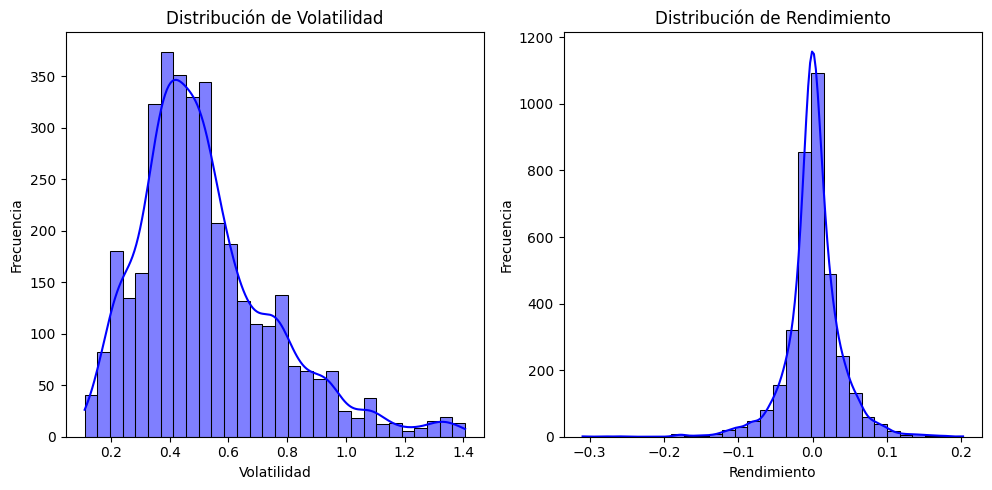

In [ ]:
# Histograma Bitcoin: Volatilidad, Rendimiento, Liquidez
variables = ["Volatilidad", "Rendimiento"]

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(bitcoin_df[var], bins=30, kde=True, color='blue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

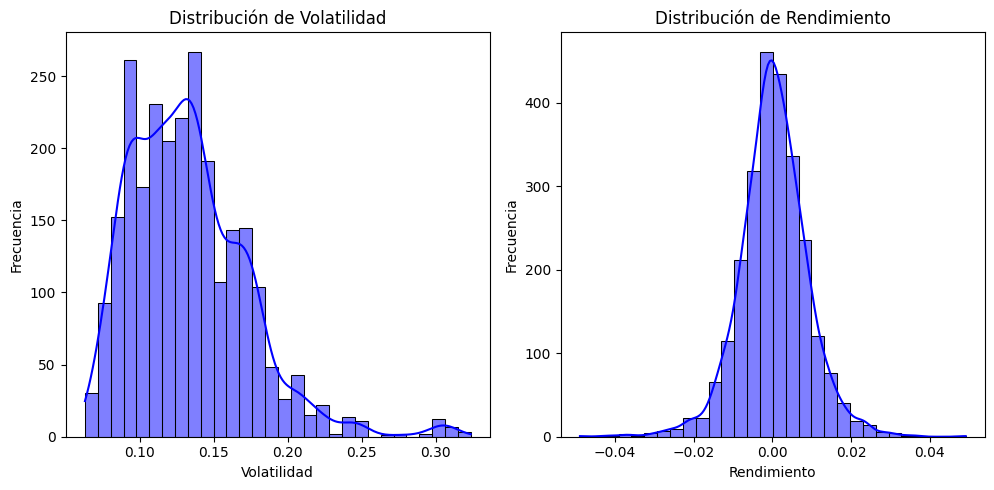

In [ ]:
# Histograma Bitcoin: Volatilidad, Rendimiento, Liquidez
variables = ["Volatilidad", "Rendimiento"]

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(oro_df[var], bins=30, kde=True, color='blue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

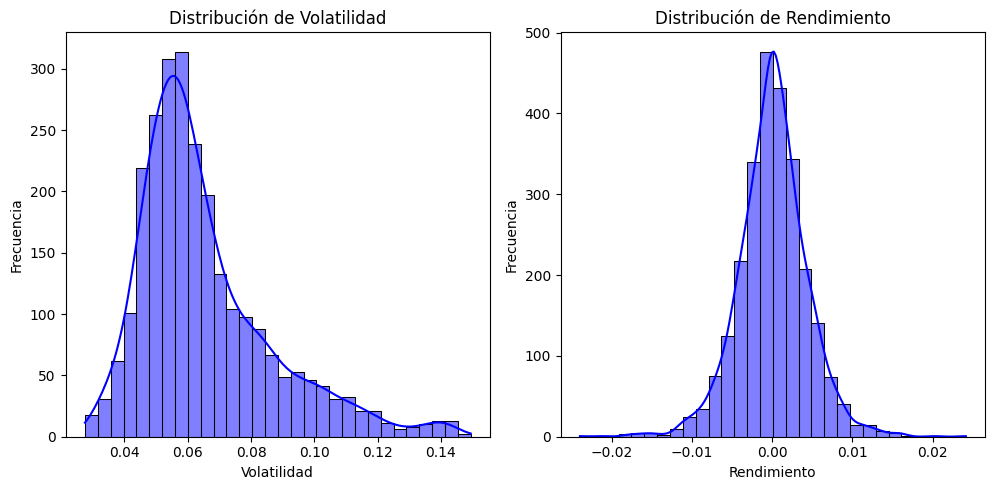

In [ ]:
# Histograma Bitcoin: Volatilidad, Rendimiento, Liquidez
variables = ["Volatilidad", "Rendimiento"]

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.histplot(dolar_df[var], bins=30, kde=True, color='blue')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Matriz de Correlación - Bitcoin:
               Exchange Date       Bid       Ask      High       Low  \
Exchange Date       1.000000  0.813570  0.813569  0.812207  0.815471   
Bid                 0.813570  1.000000  1.000000  0.999589  0.999489   
Ask                 0.813569  1.000000  1.000000  0.999592  0.999487   
High                0.812207  0.999589  0.999592  1.000000  0.999127   
Low                 0.815471  0.999489  0.999487  0.999127  1.000000   
Open                0.813543  0.999096  0.999097  0.999554  0.999302   
Refresh Rate        0.292378  0.363181  0.363260  0.369318  0.355939   
BidNet              0.026904  0.054079  0.054046  0.033865  0.037145   
Rendimiento        -0.008212  0.006832  0.006801 -0.006783 -0.004151   
Volatilidad        -0.115026 -0.066348 -0.066246 -0.060652 -0.073466   

                   Open  Refresh Rate    BidNet  Rendimiento  Volatilidad  
Exchange Date  0.813543      0.292378  0.026904    -0.008212    -0.115026  
Bid            0.99909

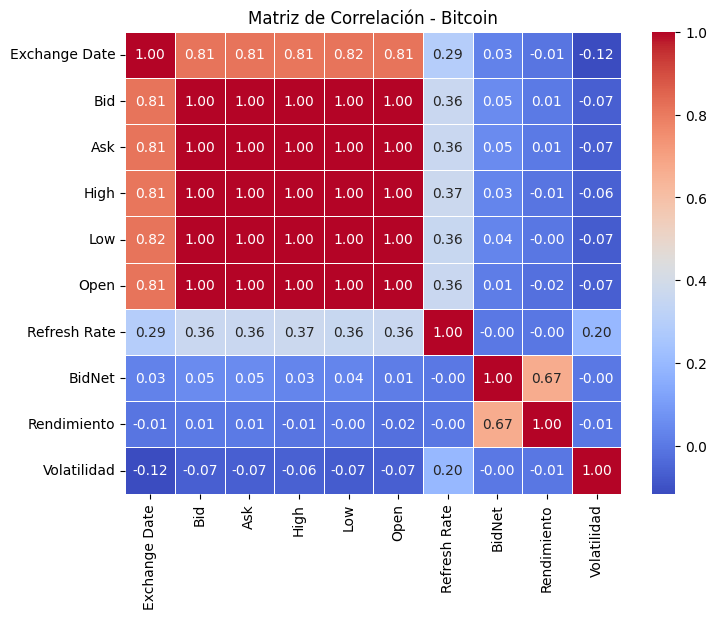

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = bitcoin_df.corr()

# Mostramos la matriz de correlación en consola
print("Matriz de Correlación - Bitcoin:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Bitcoin")
plt.show()

Matriz de Correlación - Oro:
               Exchange Date  Mid Price  Rendimiento  Volatilidad
Exchange Date       1.000000   0.916855     0.018868     0.117863
Mid Price           0.916855   1.000000     0.036597     0.253385
Rendimiento         0.018868   0.036597     1.000000    -0.007942
Volatilidad         0.117863   0.253385    -0.007942     1.000000


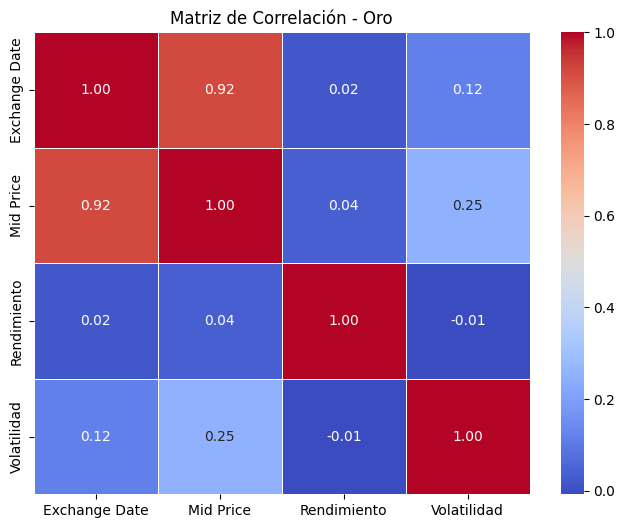

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = oro_df.corr()

print("Matriz de Correlación - Oro:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Oro")
plt.show()

Matriz de Correlación - Dólar:
               Exchange Date  Trade Price  Rendimiento  Volatilidad
Exchange Date       1.000000     0.538060     0.004542    -0.207086
Trade Price         0.538060     1.000000     0.048437     0.287754
Rendimiento         0.004542     0.048437     1.000000    -0.003501
Volatilidad        -0.207086     0.287754    -0.003501     1.000000


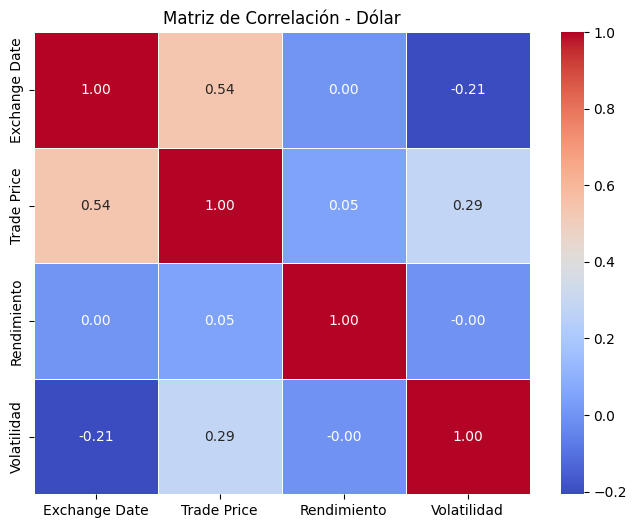

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = dolar_df.corr()
print("Matriz de Correlación - Dólar:")
print(correlation_matrix)

# Visualización con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Dólar")
plt.show()

In [ ]:
bitcoin_df['Exchange Date'] = pd.to_datetime(bitcoin_df['Exchange Date'])
bitcoin_df['Año'] = bitcoin_df['Exchange Date'].dt.year
bitcoin_df['Mes'] = bitcoin_df['Exchange Date'].dt.month
bitcoin_df['Día'] = bitcoin_df['Exchange Date'].dt.day

In [ ]:
# Número de variables (columnas)
numero_variables = bitcoin_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = bitcoin_df.shape[0]

# Tipos de datos
tipos_datos = bitcoin_df.dtypes

formato = bitcoin_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
Index: 3621 entries, 3620 to 0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Exchange Date  3621 non-null   datetime64[ns]
 1   Bid            3621 non-null   float64       
 2   Ask            3621 non-null   float64       
 3   High           3621 non-null   float64       
 4   Low            3621 non-null   float64       
 5   Open           3621 non-null   float64       
 6   Refresh Rate   3621 non-null   float64       
 7   BidNet         3621 non-null   float64       
 8   Rendimiento    3621 non-null   float64       
 9   Volatilidad    3621 non-null   float64       
 10  Año            3621 non-null   int32         
 11  Mes            3621 non-null   int32         
 12  Día            3621 non-null   int32         
dtypes: datetime64[ns](1), float64(9), int32(3)
memory usage: 353.6 KB
Número de variables (columnas): 13
Número de observaciones (fi

In [ ]:
# Convierte la columna 'Exchange Date' a objetos datetime para mejorar análisis
oro_df['Exchange Date'] = pd.to_datetime(oro_df['Exchange Date'])
oro_df['Año'] = oro_df['Exchange Date'].dt.year
oro_df['Mes'] = oro_df['Exchange Date'].dt.month
oro_df['Día'] = oro_df['Exchange Date'].dt.day


In [ ]:
# Número de variables (columnas)
numero_variables = oro_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = oro_df.shape[0]

# Tipos de datos
tipos_datos = oro_df.dtypes

# Formato (estructura general del DataFrame)
formato = oro_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, 2530 to 0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Exchange Date  2531 non-null   datetime64[ns]
 1   Mid Price      2531 non-null   float64       
 2   Rendimiento    2531 non-null   float64       
 3   Volatilidad    2531 non-null   float64       
 4   Año            2531 non-null   int32         
 5   Mes            2531 non-null   int32         
 6   Día            2531 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 128.5 KB
Número de variables (columnas): 7
Número de observaciones (filas): 2531

Tipos de datos por columna:
Exchange Date    datetime64[ns]
Mid Price               float64
Rendimiento             float64
Volatilidad             float64
Año                       int32
Mes                       int32
Día                       int32
dtype: object


In [ ]:
# Convierte la columna 'Exchange Date' a objetos datetime para mejorar análisis
dolar_df['Exchange Date'] = pd.to_datetime(dolar_df['Exchange Date'])
dolar_df['Año'] = dolar_df['Exchange Date'].dt.year
dolar_df['Mes'] = dolar_df['Exchange Date'].dt.month
dolar_df['Día'] = dolar_df['Exchange Date'].dt.day
dolar_df['Día de la Semana'] = dolar_df['Exchange Date'].dt.dayofweek

In [ ]:
# Número de variables (columnas)
numero_variables = dolar_df.shape[1]

# Número de observaciones (filas)
numero_observaciones = dolar_df.shape[0]

# Tipos de datos
tipos_datos = dolar_df.dtypes

# Formato (estructura general del DataFrame)
formato = dolar_df.info()

# Imprime los resultados
print(f"Número de variables (columnas): {numero_variables}")
print(f"Número de observaciones (filas): {numero_observaciones}")
print("\nTipos de datos por columna:")
print(tipos_datos)

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 2597 to 0
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Exchange Date     2598 non-null   datetime64[ns]
 1   Trade Price       2598 non-null   float64       
 2   Rendimiento       2598 non-null   float64       
 3   Volatilidad       2598 non-null   float64       
 4   Año               2598 non-null   int32         
 5   Mes               2598 non-null   int32         
 6   Día               2598 non-null   int32         
 7   Día de la Semana  2598 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(4)
memory usage: 142.1 KB
Número de variables (columnas): 8
Número de observaciones (filas): 2598

Tipos de datos por columna:
Exchange Date       datetime64[ns]
Trade Price                float64
Rendimiento                float64
Volatilidad                float64
Año                          int32
Mes         

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

def analisis_medidas(dataframes):
    for nombre, df in dataframes.items():
        print(f"\n--- Análisis Estadístico {nombre} ---")
        numeric_cols = df.select_dtypes(include=[np.number]).columns

        for col in numeric_cols:
            print(f"\n{col}:")

            # Medidas de tendencia central
            print(f"Tendencia Central:")
            print(f"- Media: {df[col].mean():.4f}")
            print(f"- Mediana: {df[col].median():.4f}")
            print(f"- Moda: {df[col].mode()[0]:.4f}")

            # Medidas de dispersión
            print(f"\nDispersión:")
            print(f"- Varianza: {df[col].var():.4f}")
            print(f"- Desviación Estándar: {df[col].std():.4f}")
            print(f"- Rango: {df[col].max() - df[col].min():.4f}")
            if df[col].mean() != 0:
                coef_variacion = df[col].std() / df[col].mean() * 100
                print(f"- Coeficiente de Variación: {coef_variacion:.2f}%")
            else:
                print("- Coeficiente de Variación: Infinito o no definido (Media = 0)")

            # Medidas de forma
            print(f"\nForma:")
            print(f"- Asimetría (Skewness): {skew(df[col].dropna()):.4f}")
            print(f"- Curtosis: {kurtosis(df[col].dropna(), fisher=False):.4f}")

            # Medidas de frecuencia
            print("\nFrecuencia:")
            frecuencia = df[col].value_counts(normalize=True)
            print("Top 5 valores más frecuentes:")
            print(frecuencia.head())

# Ejecutar análisis
dataframes = {
    'Bitcoin': bitcoin_df,
    'Oro': oro_df,
    'Dólar': dolar_df
}

analisis_medidas(dataframes)


--- Análisis Estadístico Bitcoin ---

Bid:
Tendencia Central:
- Media: 20210.6254
- Mediana: 9663.1000
- Moda: 46309.6800

Dispersión:
- Varianza: 494986253.6174
- Desviación Estándar: 22248.2865
- Rango: 106243.5900
- Coeficiente de Variación: 110.08%

Forma:
- Asimetría (Skewness): 1.2326
- Curtosis: 3.8114

Frecuencia:
Top 5 valores más frecuentes:
Bid
46309.68    0.000829
12948.99    0.000552
244.60      0.000552
236.82      0.000552
11545.00    0.000552
Name: proportion, dtype: float64

Ask:
Tendencia Central:
- Media: 20216.8040
- Mediana: 9663.6000
- Moda: 224.3000

Dispersión:
- Varianza: 495120047.2906
- Desviación Estándar: 22251.2932
- Rango: 106243.0100
- Coeficiente de Variación: 110.06%

Forma:
- Asimetría (Skewness): 1.2323
- Curtosis: 3.8102

Frecuencia:
Top 5 valores más frecuentes:
Ask
11043.93    0.000552
606.35      0.000552
224.30      0.000552
11313.00    0.000552
9650.74     0.000552
Name: proportion, dtype: float64

High:
Tendencia Central:
- Media: 20691.5626


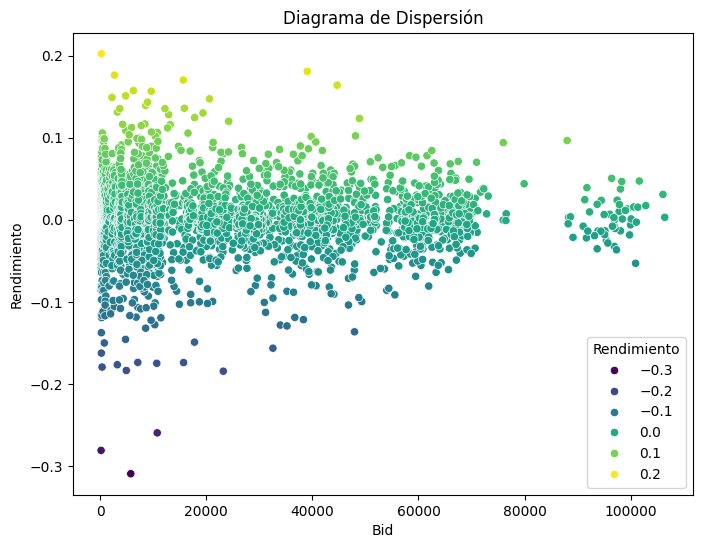

In [ ]:
# Diagrama de dispersión
#Relación entre Rendimiento y Bid de Bitcoin
data = pd.DataFrame({
    'Asset': ['Bitcoin']*len(bitcoin_df),
    'Bid': bitcoin_df['Bid'],
    'Ask': bitcoin_df['Ask'],
    'High': bitcoin_df['High'],
    'Low': bitcoin_df['Low'],
    'Volatilidad': bitcoin_df['Volatilidad'],
    'Rendimiento': bitcoin_df['Rendimiento'],
    'Año': bitcoin_df['Año'],
    'Mes': bitcoin_df['Mes'],
    'Día': bitcoin_df['Día'],
    'Exchange Date': bitcoin_df['Exchange Date']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bid', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Bid')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

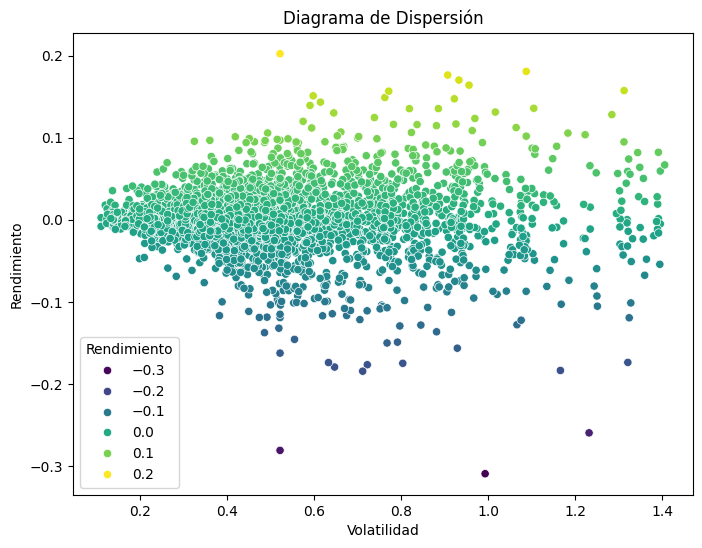

In [ ]:
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Rendimiento y Volatilidad de Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Volatilidad', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

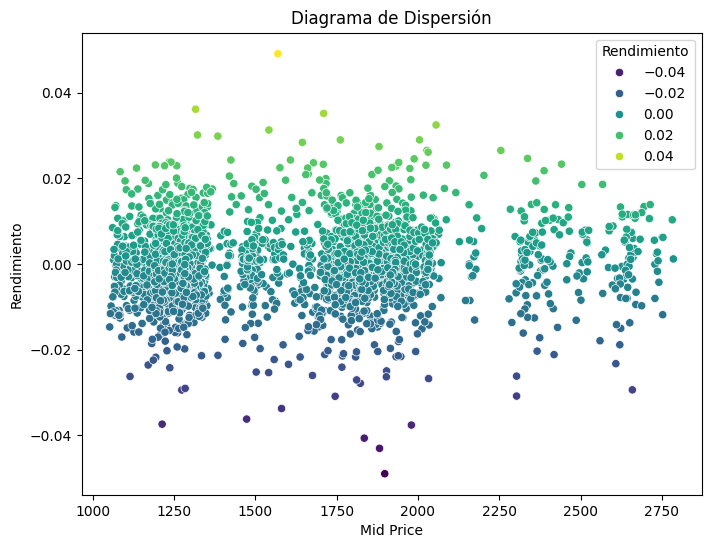

In [ ]:
# Diagrama de dispersión
data2 = pd.DataFrame({
    'Asset': ['Oro']*len(oro_df),
    'Mid Price': oro_df['Mid Price'],
    'Rendimiento': oro_df['Rendimiento'],
    'Volatilidad': oro_df['Volatilidad'],
    'Año': oro_df['Año'],
    'Volatilidad': oro_df[oro_df.columns[5]],
    'Mes': oro_df['Mes'],
    'Día': oro_df['Día'],
    'Exchange Date': oro_df['Exchange Date']

})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre High y Low con Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Mid Price', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Mid Price')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

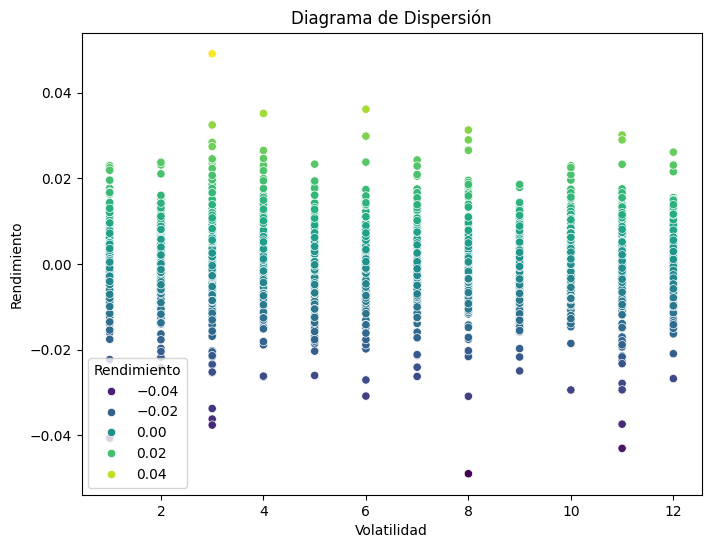

In [ ]:
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Volatilidad y Rendimiento del Oro
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x='Volatilidad', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

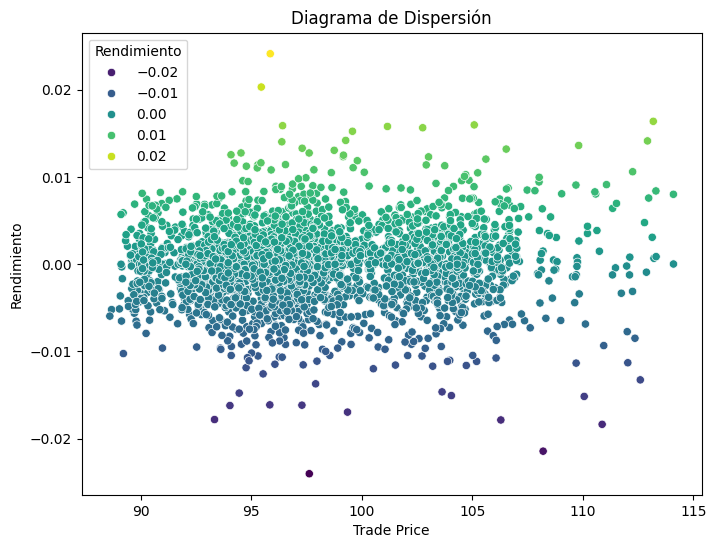

In [ ]:
# Diagrama de dispersión
data3 = pd.DataFrame({
    'Asset': ['Dolar']*len(dolar_df),
    'Trade Price': dolar_df['Trade Price'],
    'Rendimiento': dolar_df['Rendimiento'],
    'Año': dolar_df['Año'],
    'Mes': dolar_df['Mes'],
    'Día': dolar_df['Día'],
    'Día de la Semana': dolar_df['Día de la Semana'],
    'Exchange Date': dolar_df['Exchange Date'],
    'Volatilidad': dolar_df['Volatilidad']
})
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Trade price y Rendimiento con Dólar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data3, x='Trade Price', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Trade Price')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

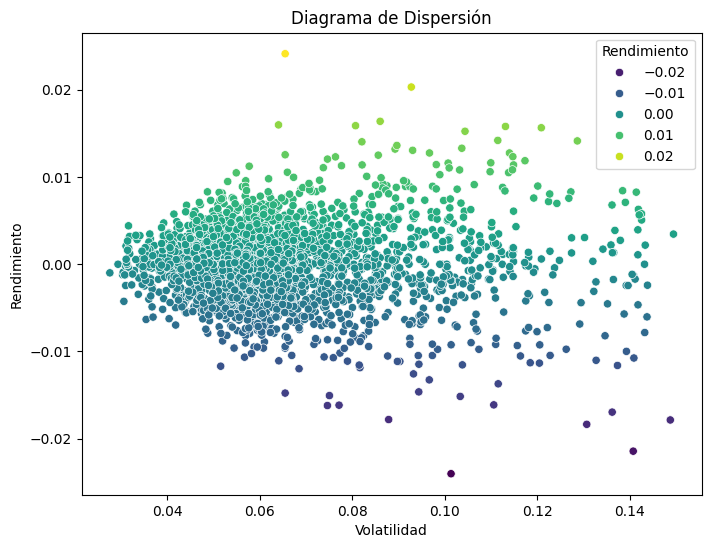

In [ ]:
#Mediante este dataframe creado haremos nuestras visualizaciones
#Relación entre Bid(oferta) y Ask(demanda) con Bitcoin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data3, x='Volatilidad', y='Rendimiento', hue='Rendimiento', palette='viridis')
plt.title('Diagrama de Dispersión')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend(title='Rendimiento')
plt.show()

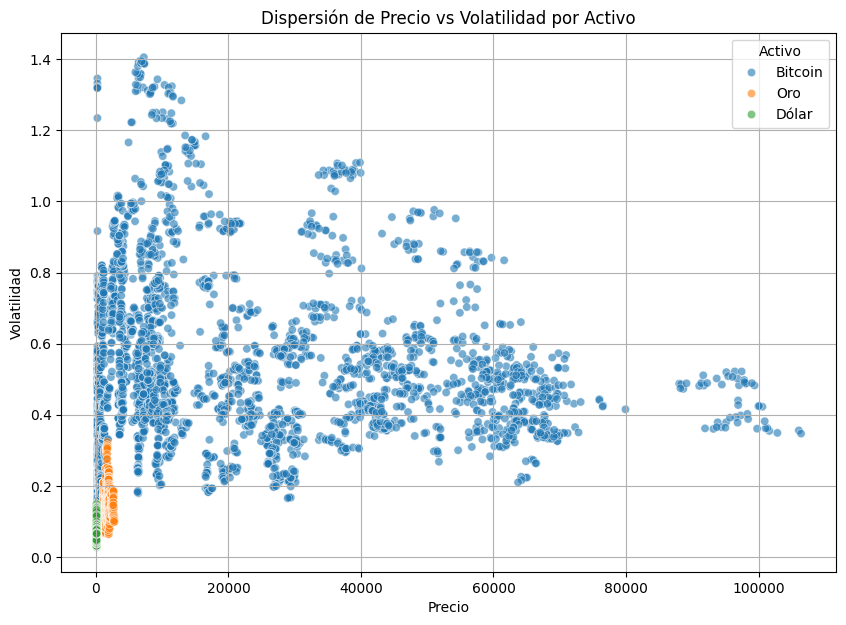

In [ ]:
# Añadir columna Activo a cada DataFrame
bitcoin_df['Activo'] = 'Bitcoin'
# Añadir columna Activo a cada DataFrame
bitcoin_df['Activo'] = 'Bitcoin'
oro_df['Activo'] = 'Oro'
dolar_df['Activo'] = 'Dólar'

# Renombrar precios para tener una misma columna 'Precio'
bitcoin_df = bitcoin_df.rename(columns={'Bid': 'Precio'})  # Changed 'Bitcoin' to 'Bid'
oro_df = oro_df.rename(columns={'Mid Price': 'Precio'})
dolar_df = dolar_df.rename(columns={'Trade Price': 'Precio'})

# Unir todos los activos en un solo DataFrame
df_all = pd.concat([bitcoin_df[['Activo', 'Precio', 'Volatilidad']], # Changed 'Bitcoin' to 'Activo'
                    oro_df[['Activo', 'Precio', 'Volatilidad']],  # Changed 'Oro' to 'Activo'
                    dolar_df[['Activo', 'Precio', 'Volatilidad']]]) # Changed 'Dólar' to 'Activo'


# Gráfico de dispersión Precio vs Volatilidad
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_all, x='Precio', y='Volatilidad', hue='Activo', alpha=0.6)
plt.title('Dispersión de Precio vs Volatilidad por Activo')
plt.xlabel('Precio')
plt.ylabel('Volatilidad')
plt.legend(title='Activo')
plt.grid(True)
plt.show()

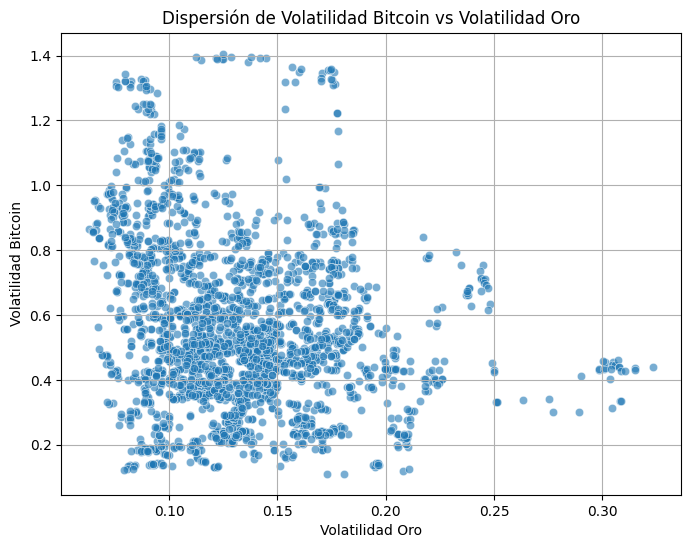

In [ ]:
# Get the minimum length between the two DataFrames
min_length = min(len(bitcoin_df), len(oro_df))

# Create the DataFrame with the aligned lengths
df_volatilidad = pd.DataFrame({
    'Volatilidad Bitcoin': bitcoin_df['Volatilidad'].values[:min_length],
    'Volatilidad Oro': oro_df['Volatilidad'].values[:min_length]
})

# Crear el scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_volatilidad, x='Volatilidad Oro', y='Volatilidad Bitcoin', alpha=0.6)
plt.title('Dispersión de Volatilidad Bitcoin vs Volatilidad Oro')
plt.xlabel('Volatilidad Oro')
plt.ylabel('Volatilidad Bitcoin')
plt.grid(True)
plt.show()

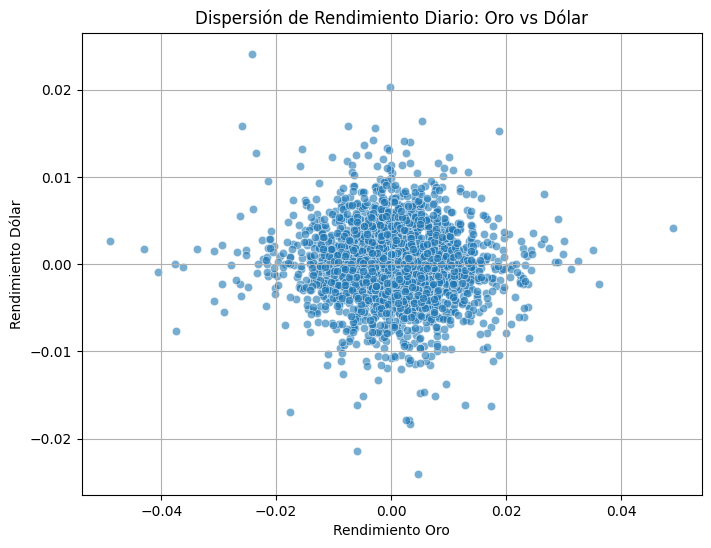

In [ ]:
# Unir en un único DataFrame, asegurándonos de que tengan la misma longitud
min_length = min(len(oro_df), len(dolar_df))
df_rendimientos = pd.DataFrame({
    'Rendimiento Oro': oro_df['Rendimiento'].values[:min_length],
    'Rendimiento Dólar': dolar_df['Rendimiento'].values[:min_length]
})

# Crear el scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_rendimientos, x='Rendimiento Oro', y='Rendimiento Dólar', alpha=0.6)
plt.title('Dispersión de Rendimiento Diario: Oro vs Dólar')
plt.xlabel('Rendimiento Oro')
plt.ylabel('Rendimiento Dólar')
plt.grid(True)
plt.show()

<ipython-input-257-a0b8d60c00eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Año', y='Volatilidad', palette='pastel')


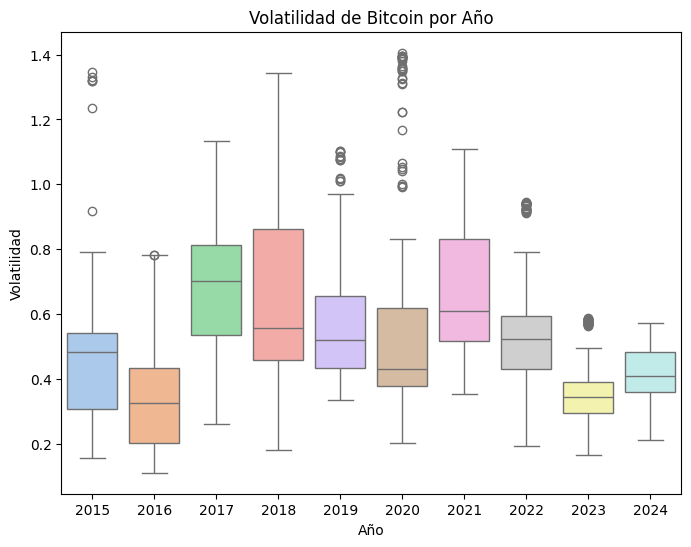

In [ ]:
# Gráfico de cajas - Bitcoin
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Año', y='Volatilidad', palette='pastel')
plt.title('Volatilidad de Bitcoin por Año')
plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.show()

<ipython-input-258-3811f0bb29f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2, x='Año', y='Volatilidad', palette='pastel')


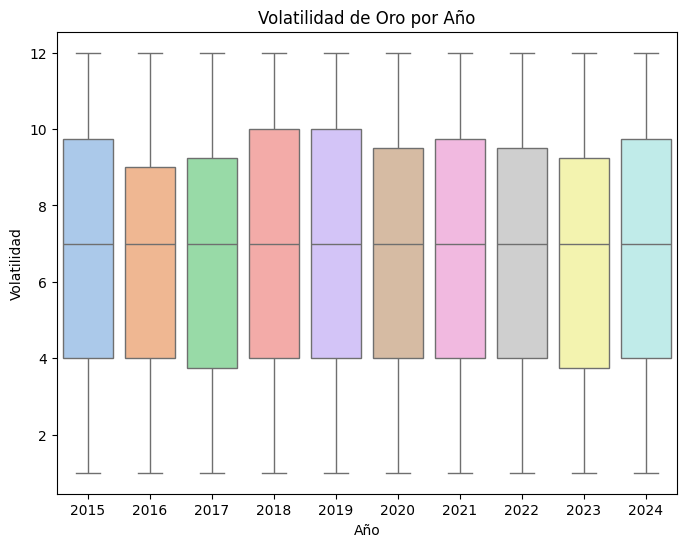

In [ ]:
# Gráfico de cajas - Bitcoin
plt.figure(figsize=(8, 6))
sns.boxplot(data=data2, x='Año', y='Volatilidad', palette='pastel')
plt.title('Volatilidad de Oro por Año')
plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.show()

<ipython-input-259-b197430e59aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data3, x='Año', y='Volatilidad', palette='pastel')


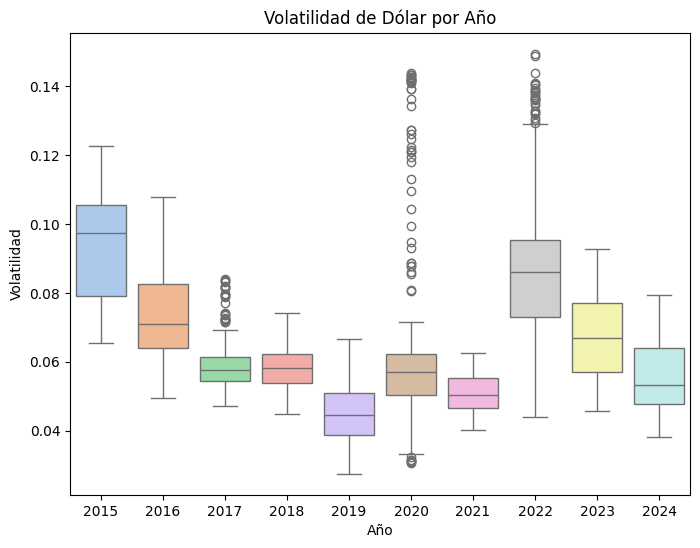

In [ ]:
# Gráfico de cajas - Dólar
plt.figure(figsize=(8, 6))
sns.boxplot(data=data3, x='Año', y='Volatilidad', palette='pastel')
plt.title('Volatilidad de Dólar por Año')
plt.xlabel('Año')
plt.ylabel('Volatilidad')
plt.show()

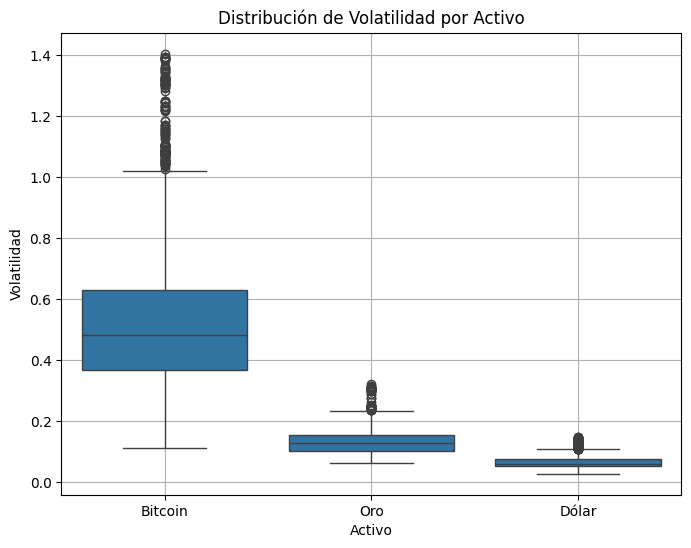

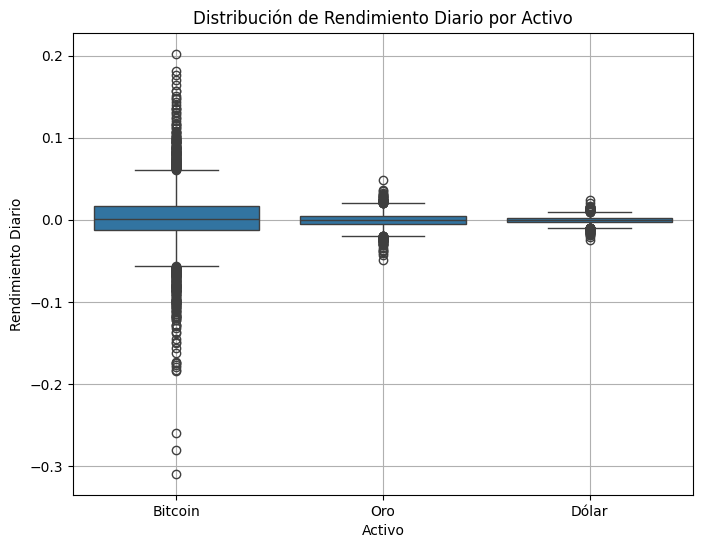

In [ ]:
# Crear un único DataFrame combinando todos
bitcoin_vol = pd.DataFrame({
    'Activo': 'Bitcoin',
    'Volatilidad': bitcoin_df['Volatilidad'],
    'Rendimiento': bitcoin_df['Rendimiento']
})

oro_vol = pd.DataFrame({
    'Activo': 'Oro',
    'Volatilidad': oro_df['Volatilidad'],
    'Rendimiento': oro_df['Rendimiento']
})

dolar_vol = pd.DataFrame({
    'Activo': 'Dólar',
    'Volatilidad': dolar_df['Volatilidad'],
    'Rendimiento': dolar_df['Rendimiento']
})

# Unir todos
df_todo = pd.concat([bitcoin_vol, oro_vol, dolar_vol])

# --- Gráfico de Boxplot de Volatilidad ---
plt.figure(figsize=(8,6))
sns.boxplot(data=df_todo, x='Activo', y='Volatilidad')
plt.title('Distribución de Volatilidad por Activo')
plt.ylabel('Volatilidad')
plt.xlabel('Activo')
plt.grid(True)
plt.show()

# --- Gráfico de Boxplot de Rendimiento ---
plt.figure(figsize=(8,6))
sns.boxplot(data=df_todo, x='Activo', y='Rendimiento')
plt.title('Distribución de Rendimiento Diario por Activo')
plt.ylabel('Rendimiento Diario')
plt.xlabel('Activo')
plt.grid(True)
plt.show()

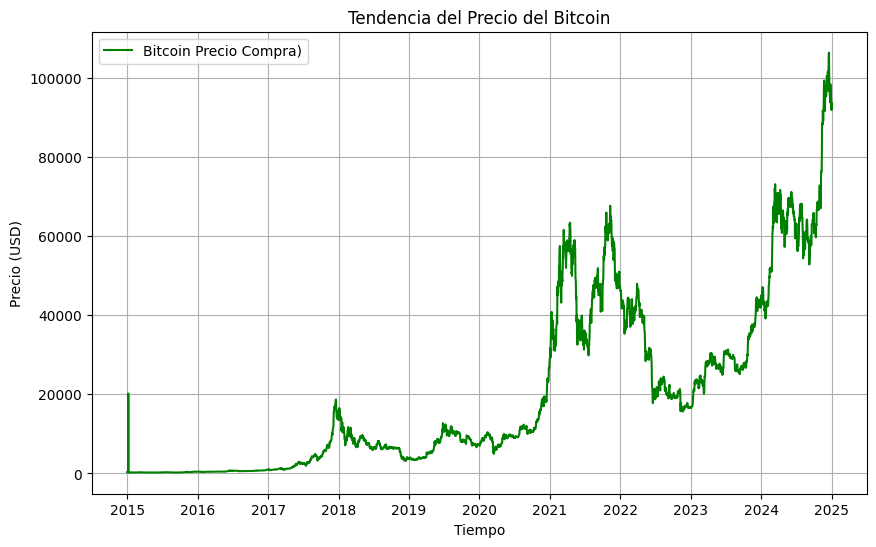

In [ ]:
# Visualización de tendencias - Bitcoin
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Exchange Date', y='Bid', color='green', label='Bitcoin Precio Compra)')
plt.title('Tendencia del Precio del Bitcoin')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()

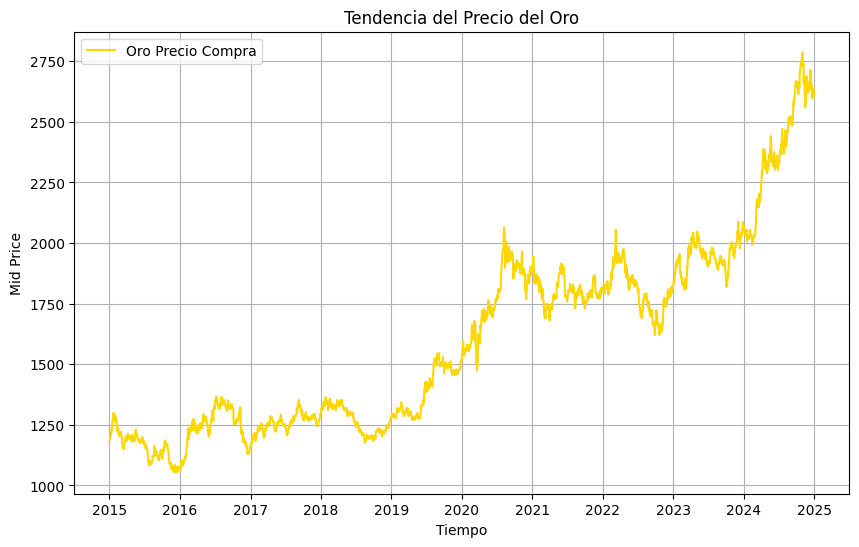

In [ ]:
# Visualización de tendencias - Oro
plt.figure(figsize=(10, 6))
sns.lineplot(data=data2, x='Exchange Date', y='Mid Price', color='gold', label='Oro Precio Compra')
plt.title('Tendencia del Precio del Oro')
plt.xlabel('Tiempo')
plt.ylabel('Mid Price')
plt.legend()
plt.grid()
plt.show()

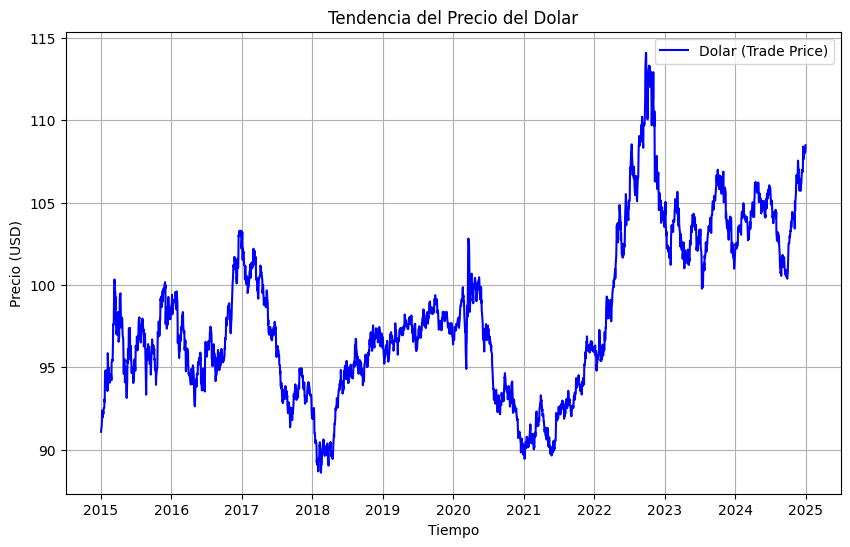

In [ ]:
#  Visualización de tendencias
plt.figure(figsize=(10, 6))
sns.lineplot(data=data3, x='Exchange Date', y='Trade Price', color='blue', label='Dolar (Trade Price)')
plt.title('Tendencia del Precio del Dolar')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -1.3583317659818992
Valor p: 0.6020814791099098
Valores críticos:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


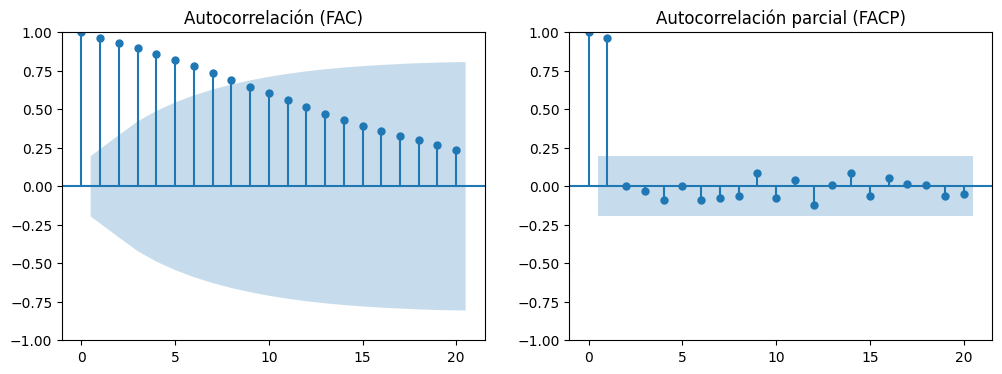


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -1.8975904890519297
Valor p: 0.33319546838684744
Valores críticos:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


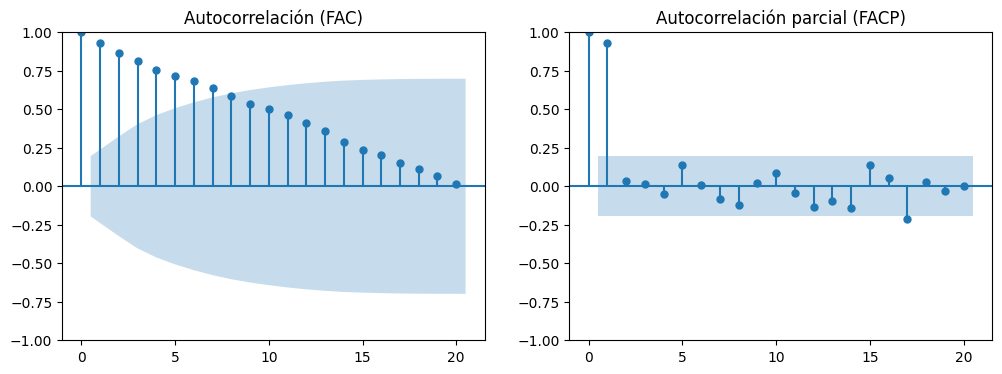


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF):
Estadístico ADF: -2.640166265127232
Valor p: 0.08497656878623072
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
No se puede rechazar la hipótesis nula: La serie no es estacionaria.


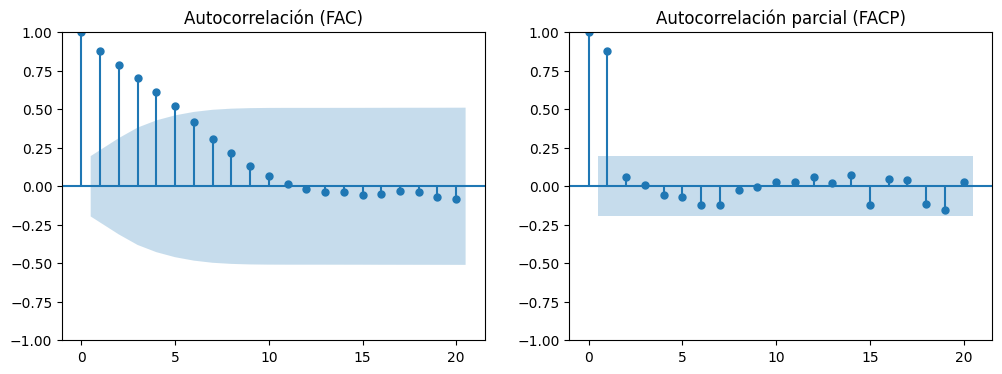

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para realizar pruebas de estacionariedad
def test_stationarity(df, column_name):
    print(f"\nResultados para {column_name}:")

    # Prueba de Dickey-Fuller Aumentada (ADF)
    result_adf = ts.adfuller(df[column_name])
    print("Prueba Dickey-Fuller Aumentada (ADF):")
    print(f"Estadístico ADF: {result_adf[0]}")
    print(f"Valor p: {result_adf[1]}")
    print("Valores críticos:")
    for key, value in result_adf[4].items():
        print(f"   {key}: {value}")

    if result_adf[1] < 0.05:
        print("Rechazamos la hipótesis nula: La serie es estacionaria.")
    else:
        print("No se puede rechazar la hipótesis nula: La serie no es estacionaria.")

    # Gráficos de ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df[column_name], ax=axes[0], lags=20)
    plot_pacf(df[column_name], ax=axes[1], lags=20)
    axes[0].set_title("Autocorrelación (FAC)")
    axes[1].set_title("Autocorrelación parcial (FACP)")
    plt.show()

# Datos simulados para Bitcoin, Oro y Dólar
np.random.seed(42)
bitcoin_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
oro_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
dolar_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})

# Aplicar pruebas a cada serie temporal
test_stationarity(bitcoin_df, 'value')
test_stationarity(oro_df, 'value')
test_stationarity(dolar_df, 'value')



Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -10.008881137130237
Valor p: 1.800687720719554e-17
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


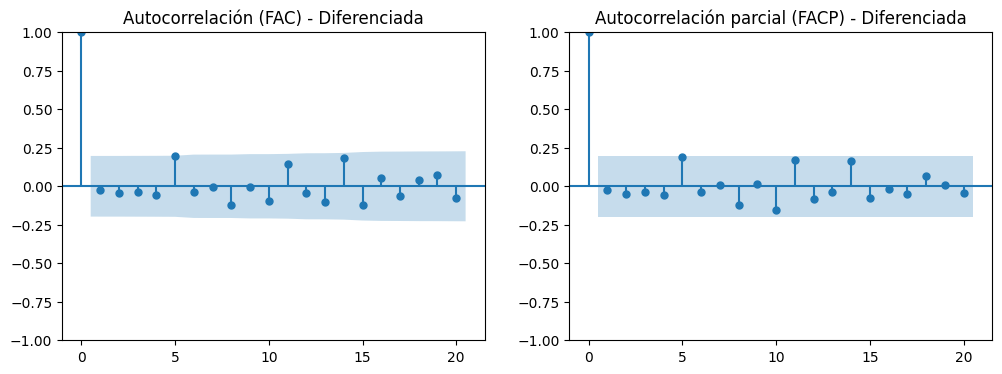


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -10.809982939729167
Valor p: 1.9196947925176694e-19
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


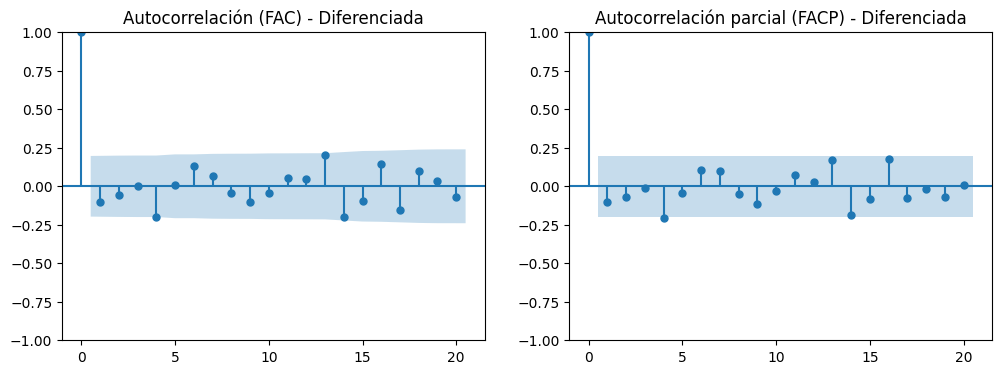


Resultados para value:
Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:
Estadístico ADF: -11.066490842080276
Valor p: 4.667552181128384e-20
Valores críticos:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157
Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.


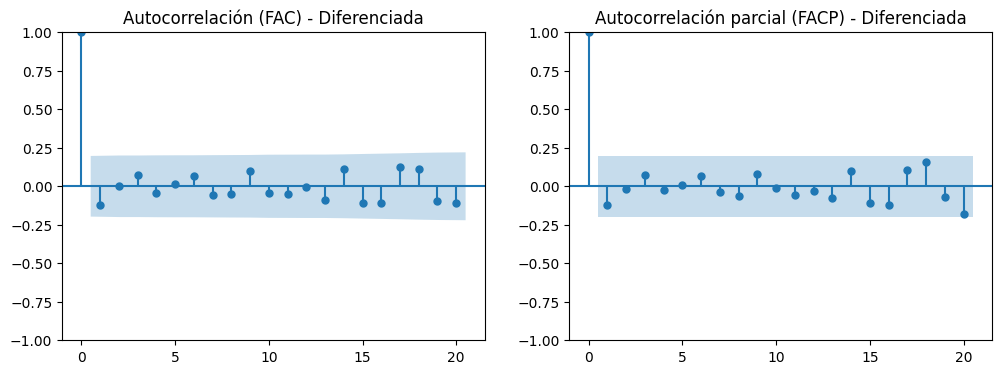

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Función para realizar pruebas de estacionariedad con diferenciación
def test_stationarity(df, column_name):
    print(f"\nResultados para {column_name}:")

    # Aplicar primera diferencia
    df_diff = df[column_name].diff().dropna()

    # Prueba de Dickey-Fuller Aumentada (ADF)
    result_adf = ts.adfuller(df_diff)
    print("Prueba Dickey-Fuller Aumentada (ADF) después de la diferenciación:")
    print(f"Estadístico ADF: {result_adf[0]}")
    print(f"Valor p: {result_adf[1]}")
    print("Valores críticos:")
    for key, value in result_adf[4].items():
        print(f"   {key}: {value}")

    if result_adf[1] < 0.05:
        print("Rechazamos la hipótesis nula: La serie diferenciada es estacionaria.")
    else:
        print("No se puede rechazar la hipótesis nula: La serie diferenciada no es estacionaria.")

    # Gráficos de ACF y PACF después de la diferenciación
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df_diff, ax=axes[0], lags=20)
    plot_pacf(df_diff, ax=axes[1], lags=20)
    axes[0].set_title("Autocorrelación (FAC) - Diferenciada")
    axes[1].set_title("Autocorrelación parcial (FACP) - Diferenciada")
    plt.show()

# Datos simulados para Bitcoin, Oro y Dólar
np.random.seed(42)
bitcoin_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
oro_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})
dolar_df = pd.DataFrame({'value': np.cumsum(np.random.randn(100))})

# Aplicar pruebas a cada serie temporal
test_stationarity(bitcoin_df, 'value')
test_stationarity(oro_df, 'value')
test_stationarity(dolar_df, 'value')


In [ ]:
print("Tipos de datos antes de convertir:")
print(bitcoin_df.dtypes)

# Convertir TODAS las columnas a numéricas (forzando la conversión si es posible)
bitcoin_df = bitcoin_df.apply(pd.to_numeric, errors='coerce')

# Verificar qué columnas quedaron como numéricas después de la conversión
variables_numericas = bitcoin_df.select_dtypes(include=['float64', 'int'])

# Mostrar las columnas detectadas como numéricas
print("Columnas numéricas detectadas:", variables_numericas.columns)

# Verificar si hay columnas eliminadas por ser constantes
print("Desviación estándar de cada columna:")
print(variables_numericas.std())

# Generar la matriz de correlación si hay más de una variable numérica
if len(variables_numericas.columns) > 1:
    correlation_matrix = variables_numericas.corr()
    print("Matriz de correlación:")
    print(correlation_matrix)
else:
    print("Solo se detectó una columna numérica, no se puede hacer matriz de correlación.")


Tipos de datos antes de convertir:
value    float64
dtype: object
Columnas numéricas detectadas: Index(['value'], dtype='object')
Desviación estándar de cada columna:
value    4.643998
dtype: float64
Solo se detectó una columna numérica, no se puede hacer matriz de correlación.


In [ ]:
# Identificación de outliers - Bitcoin

# Usaremos el método de Z-score para identificar outliers
def detect_outliers_zscore(bitcoin_df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = zscore(bitcoin_df[col].dropna())  # Evitar valores nulos
        outliers[col] = np.where(np.abs(z_scores) > threshold)[0]  # Índices de outliers
    return outliers

# Seleccionar las columnas numéricas para analizar outliers
numeric_columns = data.select_dtypes(include=np.number).columns

# Identificar outliers en las columnas numéricas
outliers = detect_outliers_zscore(data, numeric_columns)

# Imprimir los índices de los outliers detectados
for col, indices in outliers.items():
    print(f"\nOutliers detectados en la columna '{col}': {indices}")


Outliers detectados en la columna 'Bid': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Ask': [3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'High': [3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584
 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598
 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612
 3613 3614 3615 3616 3617 3618 3619 3620]

Outliers detectados en la columna 'Low': [3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 

# Descargar los archivos
files.download("bitcoin.xlsx")
files.download("oro.xlsx")
files.download("dolar.xlsx")